# Homework
In this assignment, you need to implement a baseline DL pipeline <br>
for the task of your project. For that, you have to 1) identify your task <br>
and 2) find/prepare a dataset. This assignment will be a pre-step <br>
towards your final project. So, once you select the task,<br>
you will not be allowed to change it until the end of the course.<br>
However, you are allowed to use any dataset for your task.<br>

<b>Requirements:</b> <br>
You have to follow the DL pipeline outlined above for your task. <br>
Although some steps might not be applicable for your task and dataset pair <br>
(e.g.: the dataset has only features, or pre-trained model is not used),<br>
but the task specification, model training and model evaluation steps are mandatory.<br>

<b>Deadline</b>: 23:59, 29.11.2023 <br>
<b>Late submissions</b>: 20% point deduction will be applied.

This project uses the RAVDESS dataset which contains emotional speech of different expressions with over a thousand files

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings

In [2]:
Ravdess = 'audio_speech_actors_01-24/'

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
df = pd.concat([emotion_df, path_df], axis=1)

df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
df.head()


,Emotions,Path
0,neutral,audio_speech_actors_01-24/Actor_01/03-01-01-01...
1,neutral,audio_speech_actors_01-24/Actor_01/03-01-01-01...
2,neutral,audio_speech_actors_01-24/Actor_01/03-01-01-01...
3,neutral,audio_speech_actors_01-24/Actor_01/03-01-01-01...
4,calm,audio_speech_actors_01-24/Actor_01/03-01-02-01...


In [4]:
print(df)

      Emotions                                               Path
0      neutral  audio_speech_actors_01-24/Actor_01/03-01-01-01...
1      neutral  audio_speech_actors_01-24/Actor_01/03-01-01-01...
2      neutral  audio_speech_actors_01-24/Actor_01/03-01-01-01...
3      neutral  audio_speech_actors_01-24/Actor_01/03-01-01-01...
4         calm  audio_speech_actors_01-24/Actor_01/03-01-02-01...
...        ...                                                ...
1435  surprise  audio_speech_actors_01-24/Actor_24/03-01-08-01...
1436  surprise  audio_speech_actors_01-24/Actor_24/03-01-08-02...
1437  surprise  audio_speech_actors_01-24/Actor_24/03-01-08-02...
1438  surprise  audio_speech_actors_01-24/Actor_24/03-01-08-02...
1439  surprise  audio_speech_actors_01-24/Actor_24/03-01-08-02...

[1440 rows x 2 columns]


In [5]:
df['Emotions'].value_counts()

Emotions
calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: count, dtype: int64

In [6]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

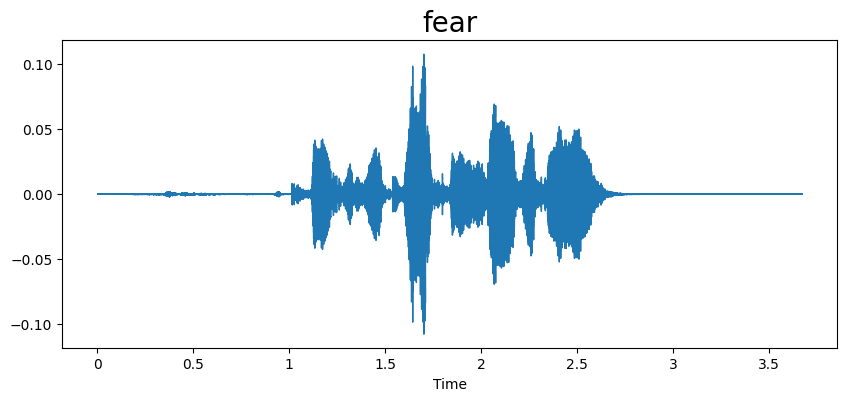

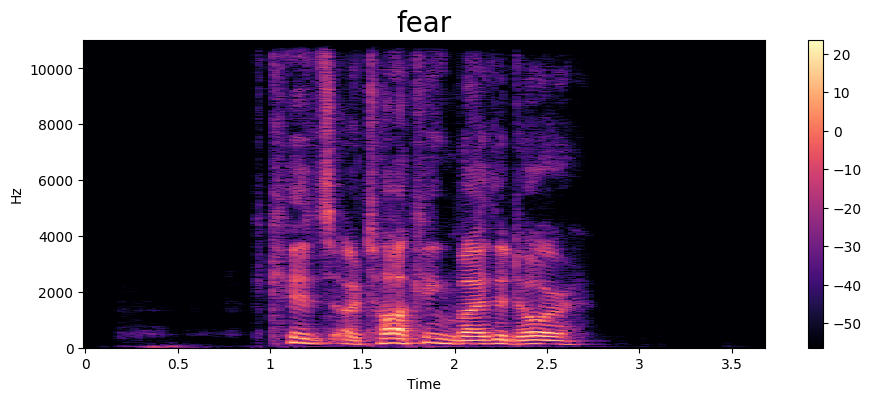

In [7]:
emotion = 'fear'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

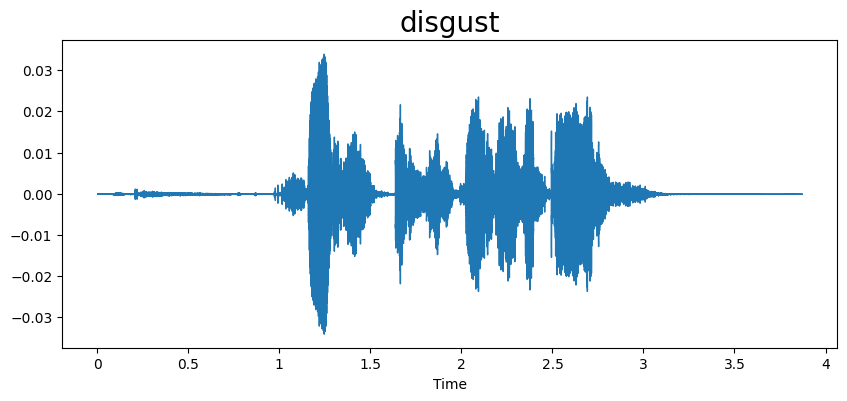

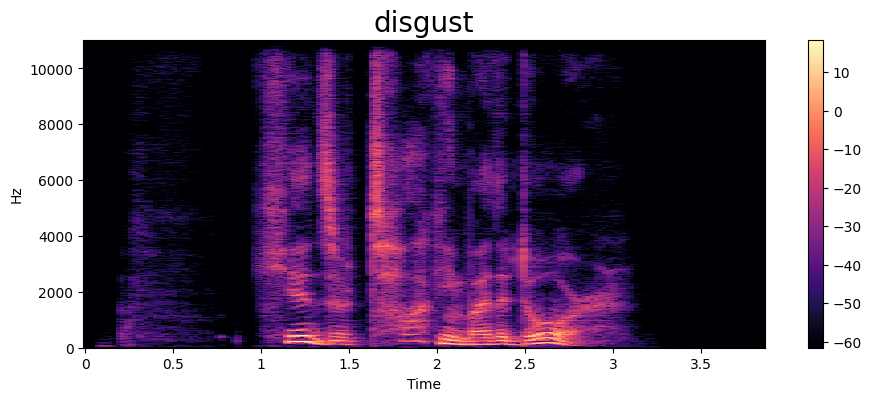

In [8]:
emotion = 'disgust'
path = np.array(df['Path'][df['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)